Імпортуємо потрібну бібліотеку.

In [59]:
import pandas as pd 

In [60]:
def getDataset(path):
    return pd.read_csv(path, sep=',',encoding='cp1252')

dataset = getDataset('FullDataset.csv')

dataset = dataset[dataset["ID"]<10000]
dataset.info()
dataset.head(10)

def isMatch(str,lst):
    for l in lst:
        if(l == str):
            return 1
    return 0
lst1 = ["Cross Country Skiing", "Sailing", "Athletics", "Alpine Skiing", "Luge", "Rowing", "Swimming", "Canoeing", "Cycling", "Freestyle Skiing"]
lst2 = ["Speed Skating", "Weightlifting", "Bobsleigh", "Archery", "Shooting", "Trampolining", "Snowboarding", "Ski Jumping", "Short Track Speed Skating", "Skeleton"]
lst3 = ["Gymnastics", "Diving", "Figure Skating", "Synchronized Swimming", "Rhythmic Gymnastics", "Curling", "Golf"]
lst4 = ["Judo", "Wrestling", "Taekwondo", "Boxing", "Fencing"]
lst5 = ["Biathlon", "Modern Pentathlon", "Nordic Combined", "Triathlon"]
lst6 = ["Basketball","Ice Hockey", "Badminton", "Football", "Equestrianism", "Handball", "Water Polo", "Tennis", "Hockey", "Softball", "Volleyball", "Table Tennis", "Baseball", "Rugby Sevens", "Beach Volleyball"]

for i in range(len(dataset)) :
    if(isMatch(dataset.iloc[i]["Sport"], lst1) == 1):
        dataset.at[i,"Sport"] = 'Cyclic'
    elif(isMatch(dataset.iloc[i]["Sport"], lst2) == 1):
        dataset.at[i,"Sport"] = 'Speed'
    elif(isMatch(dataset.iloc[i]["Sport"], lst3) == 1):
        dataset.at[i,"Sport"] = 'Coordination'
    elif(isMatch(dataset.iloc[i]["Sport"], lst4) == 1):
        dataset.at[i,"Sport"] = 'Fight'
    elif(isMatch(dataset.iloc[i]["Sport"], lst5) == 1):
        dataset.at[i,"Sport"] = 'All-around'
    else:
        dataset.at[i,"Sport"] = 'Games'


dataset.to_csv("check1.csv", sep=',', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9917 entries, 0 to 9916
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9917 non-null   int64  
 1   ID          9917 non-null   int64  
 2   Sex         9917 non-null   object 
 3   Age         9917 non-null   int64  
 4   Height      9917 non-null   int64  
 5   Weight      9917 non-null   int64  
 6   Team        9917 non-null   object 
 7   Year        9917 non-null   int64  
 8   Season      9917 non-null   object 
 9   Sport       9917 non-null   object 
 10  Medal       1222 non-null   object 
 11  Code        9917 non-null   object 
 12  GDP         9917 non-null   float64
 13  Population  9917 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


Приберемо непотрібні для нашого аналізу стовпчики.

In [61]:
dataset = dataset.drop("Unnamed: 0", axis = 1)
dataset = dataset.drop("Code", axis = 1)
dataset = dataset.drop("Year", axis = 1)
dataset = dataset.drop("Team", axis = 1)
dataset = dataset.drop("ID", axis = 1)
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9917 entries, 0 to 9916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         9917 non-null   object 
 1   Age         9917 non-null   int64  
 2   Height      9917 non-null   int64  
 3   Weight      9917 non-null   int64  
 4   Season      9917 non-null   object 
 5   Sport       9917 non-null   object 
 6   Medal       1222 non-null   object 
 7   GDP         9917 non-null   float64
 8   Population  9917 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB


,Sex,Age,Height,Weight,Season,Sport,Medal,GDP,Population
0,M,24,180,80,Summer,Games,NaN,4.269157e+11,1.164970e+09
1,M,23,170,60,Summer,Fight,NaN,8.532230e+12,1.350695e+09
2,F,21,185,82,Winter,Speed,NaN,2.619105e+11,1.476009e+07
3,F,21,185,82,Winter,Speed,NaN,2.619105e+11,1.476009e+07
4,F,25,185,82,Winter,Speed,NaN,3.629629e+11,1.518417e+07
5,F,25,185,82,Winter,Speed,NaN,3.629629e+11,1.518417e+07
6,F,27,185,82,Winter,Speed,NaN,3.791303e+11,1.538284e+07
7,F,27,185,82,Winter,Speed,NaN,3.791303e+11,1.538284e+07
8,M,31,188,75,Winter,Cyclic,NaN,6.520327e+12,2.565140e+08
9,M,31,188,75,Winter,Cyclic,NaN,6.520327e+12,2.565140e+08


Змінимо значення поля з медалями як булеве чи здобув спортсмен медаль.

In [62]:
dataset["Medal"].notnull().astype('int')
dataset["Medal"].fillna(0,inplace = True)
dataset["Medal"].fillna(0,inplace = True)

dataset["Medal"]=dataset["Medal"].replace(regex=["Gold"],value='1')
dataset["Medal"]=dataset["Medal"].replace(regex=["Bronze"],value='1')
dataset["Medal"]=dataset["Medal"].replace(regex=["Silver"],value='1')
dataset.to_csv("check1.csv", sep=',', encoding='utf-8')



Ми готові працювати з даними. Тепер давайте розподілимо дані на тренувальні та дані для тесту.

In [63]:
from sklearn.model_selection import train_test_split
trainingData, testingData  = train_test_split(dataset,test_size=0.30,random_state = 1)

features = pd.concat([trainingData,testingData]).reset_index(drop = True)
features = pd.get_dummies(features)
features = features.drop("Medal_0", axis = 1)
features.rename(columns = {'Medal_1':'Medal'}, inplace = True)
trainingData = features.iloc[:trainingData.shape[0],:]
testingData = features.iloc[trainingData.shape[0]:,:]
print(trainingData.head(10))


   Age  Height  Weight           GDP   Population  Sex_F  Sex_M  \
0   20     180      73  1.196249e+11   12418834.0      0      1   
1   21     198      95  1.991289e+10    9849459.0      0      1   
2   27     174      70  1.179660e+12   57580402.0      1      0   
3   31     178      65  1.700778e+11  171648986.0      0      1   
4   28     175      75  1.706358e+11   20058035.0      0      1   
5   28     175      71  1.179660e+12   57580402.0      0      1   
6   20     172      52  1.376051e+10   24650400.0      1      0   
7   23     177      68  1.586624e+11   19033845.0      0      1   
8   17     155      48  7.447734e+11   30685730.0      1      0   
9   22     169      63  2.463659e+10   14858948.0      1      0   

   Season_Summer  Season_Winter  Sport_All-around  Sport_Coordination  \
0              1              0                 0                   0   
1              1              0                 0                   0   
2              1              0            

Тепер визначимо змінні X та Y для тренувальних та тестувальних даних.

In [64]:
trainingX  = trainingData.drop(columns='Medal')
trainingY = trainingData['Medal']

testingX  = testingData.drop(columns='Medal')
testingY = testingData['Medal']

trainingY.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6941 entries, 0 to 6940
Series name: Medal
Non-Null Count  Dtype
--------------  -----
6941 non-null   uint8
dtypes: uint8(1)
memory usage: 6.9 KB


Додамо необхідні бібліотеки для побудови моделей, побудуємо їх та перевіримо на тестових даних. Спочатку класифікатор Decision Tree.

Cvs in Decision Tree: 0.8397932084741576
Score of Decision Tree: 0.8481182795698925


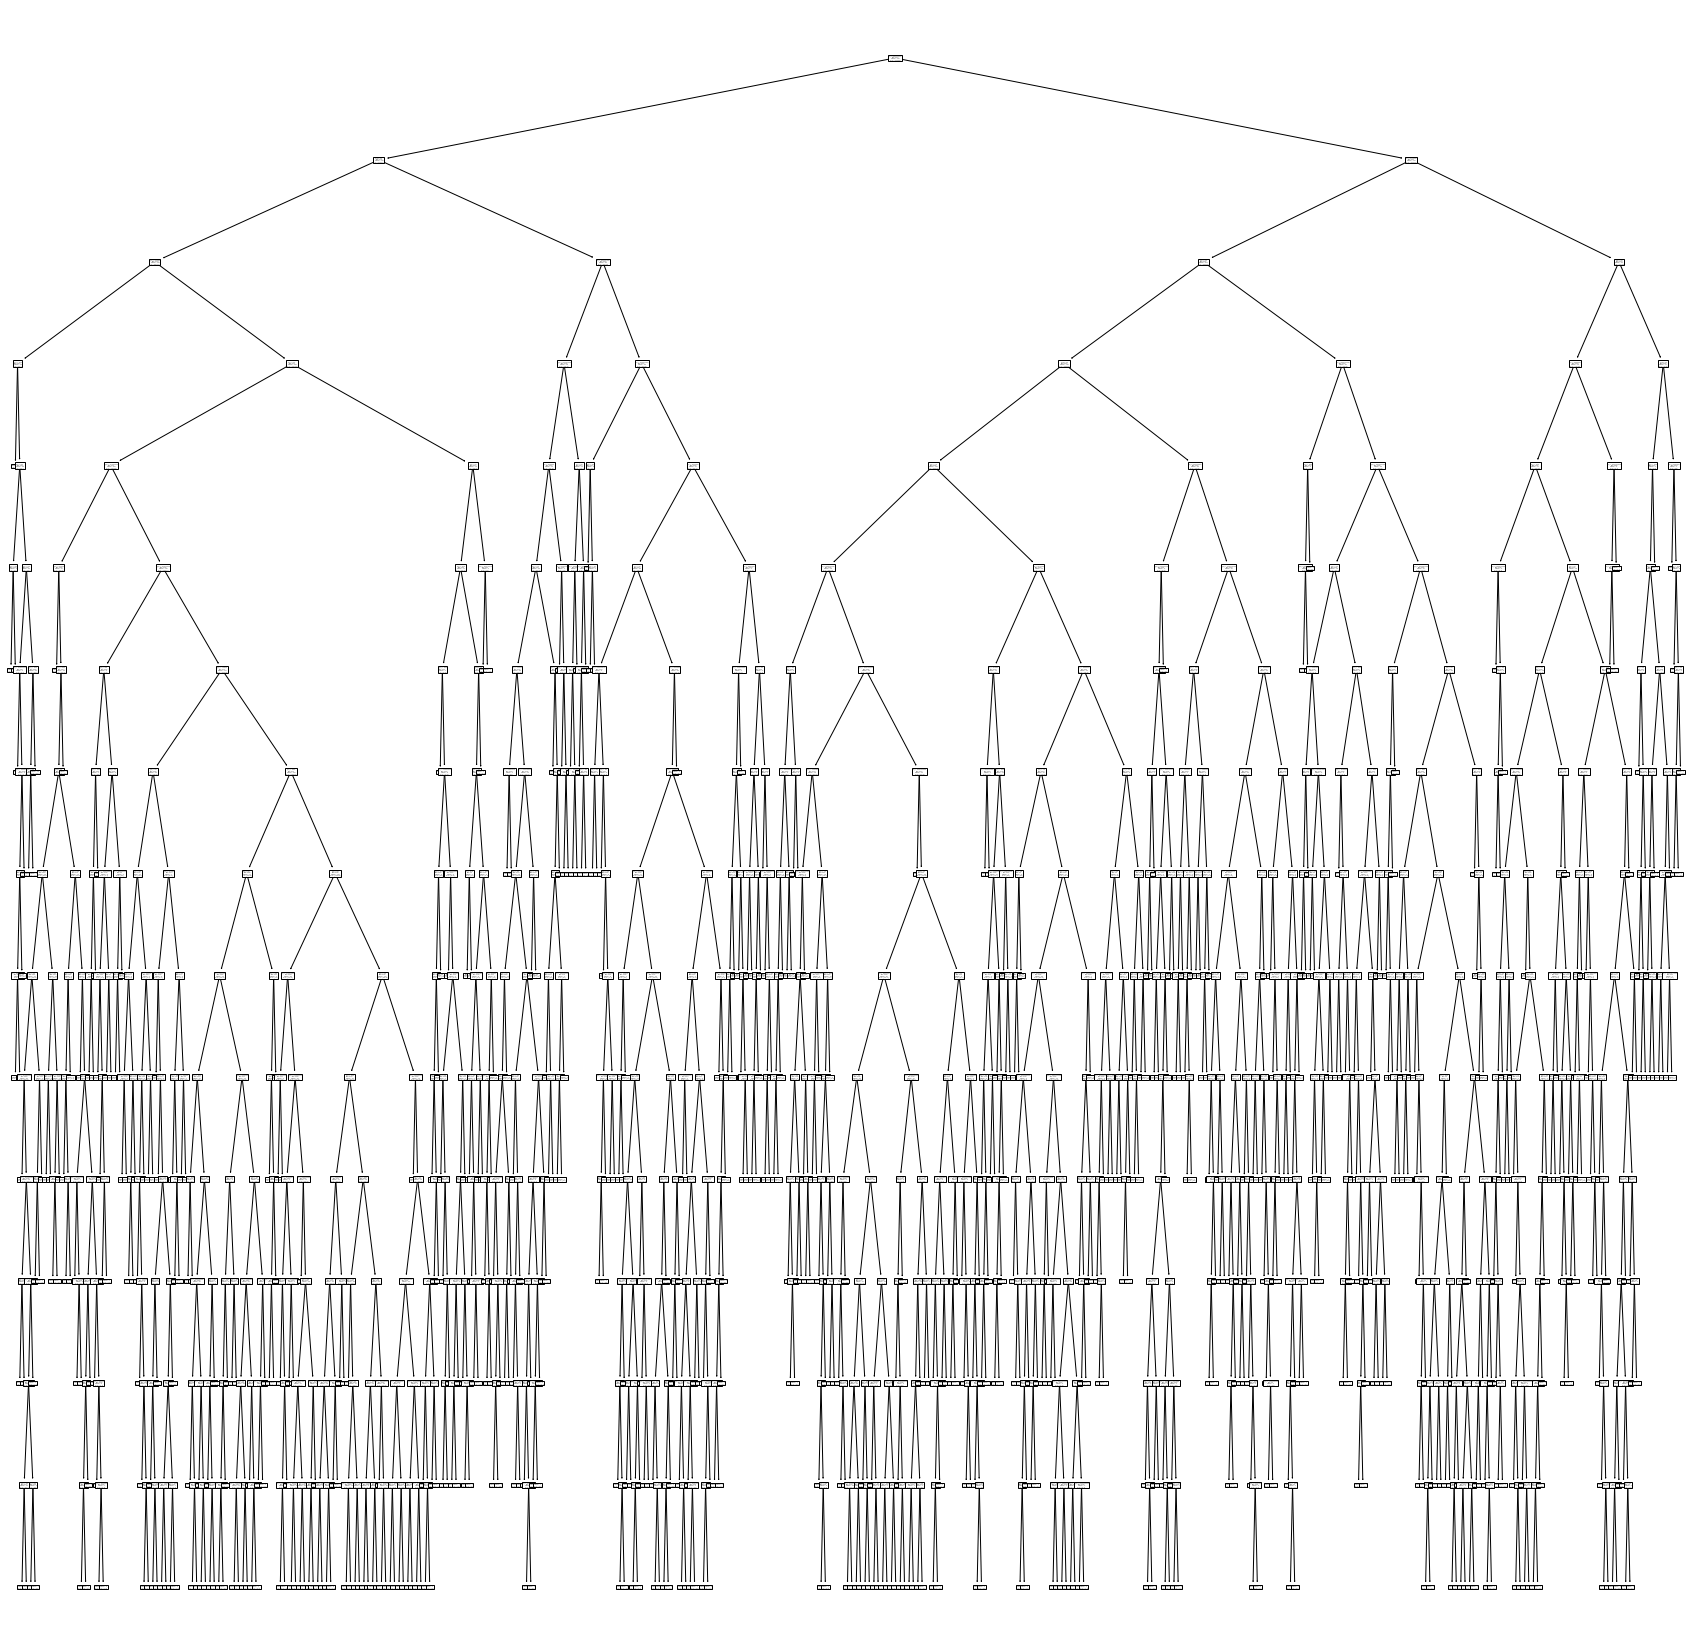

0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
decisionTree = DecisionTreeClassifier(max_depth=15,random_state=1)
tree_scores = cross_val_score(decisionTree,trainingX,trainingY,cv = 5)
print('Cvs in Decision Tree:', tree_scores.mean())
decisionTree.fit(trainingX,trainingY)
print('Score of Decision Tree:',decisionTree.score(testingX,testingY)) 

plt.figure(figsize=(30,30))  
tree.plot_tree(decisionTree)
plt.show()
count = 0
arr = decisionTree.predict(testingX)
for i in range(len(arr)):
    print(arr[i])
    if(arr[i] == 1):
        count += 1 
print("Check",count)

[[2426  190]
 [ 262   98]]


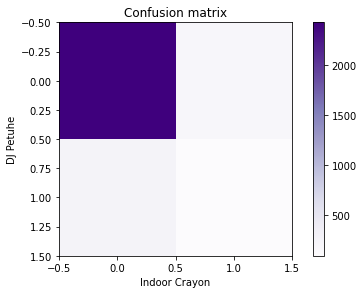

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testingY,arr)
print(cm)

def plot_confusion_matrix(cm,title = "Confusion matrix",cmap = plt.cm.Purples):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('DJ Petuhe')
    plt.xlabel('Indoor Crayon')
plt.figure()
plot_confusion_matrix(cm)
plt.show()

Тепер класифікатор Random Forest. 

In [67]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(max_depth=15)
tree_scores = cross_val_score(randomForest,trainingX,trainingY,cv = 5)
print('Cvs in Random Forest:', tree_scores.mean())
randomForest.fit(trainingX,trainingY)
print('Score of Random Forest:',randomForest.score(testingX,testingY)) 
count = 0
arr = randomForest.predict(testingX)
for i in range(len(arr)):
    print(arr[i])
    if(arr[i] == 1):
        count += 1 
print("Check",count)

Cvs in Random Forest: 0.8746584423102061
Score of Random Forest: 0.8786962365591398
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


[[2564   52]
 [ 309   51]]


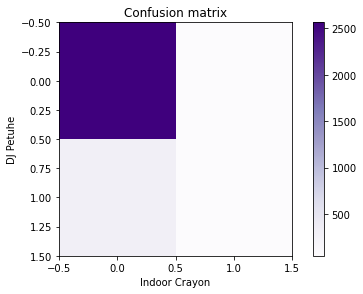

In [68]:
cm = confusion_matrix(testingY,arr)
print(cm)

plt.figure()
plot_confusion_matrix(cm)
plt.show()

Тепер класифікатор Gradient Boosting.

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoosting = GradientBoostingClassifier(learning_rate = 0.1)
tree_scores = cross_val_score(gradientBoosting,trainingX,trainingY,cv = 5)
print('Cvs in Gradient Boosting:', tree_scores.mean())
gradientBoosting.fit(trainingX,trainingY)
print('Score of Gradient Boosting:',gradientBoosting.score(testingX,testingY)) 


Cvs in Gradient Boosting: 0.8771068689144638
Score of Gradient Boosting: 0.8817204301075269


[[2605   11]
 [ 341   19]]


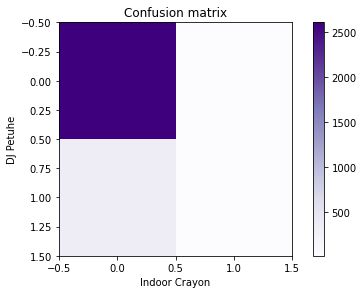

In [75]:
cm = confusion_matrix(testingY,arr)
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()